In [52]:
import pandas as pd
import numpy as np
import seaborn as sb

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# the support vector machine class :  SVM  
from sklearn.svm import SVC 

# parsing and preprocessing :
import gmparser as parse

In [31]:
data, encoded_data, X, y = parse.main()

In [32]:
data.head()

,activeInsulin,carbs,insulin,trend,glycaemia,hour,tag,postp tag
dateTime,,,,,,,,
2019-02-07 09:24:00,0.0,30.0,3.75,0.0,184.0,9,hyper,hyper
2019-02-07 12:53:00,0.0,56.0,4.95,0.0,133.0,12,normo,hyper
2019-02-07 17:39:00,0.0,12.0,1.00,0.0,99.0,17,normo,normo
2019-02-07 18:13:00,0.0,10.0,0.00,0.0,101.0,18,normo,normo
2019-02-09 10:52:00,0.0,85.0,7.80,0.0,105.0,10,normo,hyper


In [33]:
#X

In [34]:
X2 = preprocessing.scale(X)

In [35]:
#X2

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state = 0) 

In [37]:
kf = KFold(n_splits=5, shuffle=False).split(y)

In [38]:
#print('Training', 7*'\t', 'Testing')
#for i, j in kf:
#    print(f'{i[0:4]}... \t{i[len(i)-5:len(i)]}, \t{j}')

In [39]:
svm_model_linear  = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_model_rbf     = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train) 
svm_model_sigmoid = SVC(kernel = 'sigmoid', C = 1).fit(X_train, y_train) 
svm_predictions   = svm_model_sigmoid.predict(X_test) 

/home/gml/anaconda3/envs/DiabManager/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/gml/anaconda3/envs/DiabManager/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [40]:
kernels = ['linear', 'rbf', 'sigmoid']
svc  = lambda x: SVC(kernel = x, C = 1, gamma = 'auto')
SVMs = dict(
    [(i, svc(i)) for i in kernels]
)

In [41]:
SVMs

{'linear': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'rbf': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'sigmoid': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)}

In [14]:
sigmoid_cvl = cross_val_score(SVMs['sigmoid'], X2, y, scoring='accuracy', cv = 15)

In [29]:
print(f'Cross validation scores: \nMin: {sigmoid_cvl.min()}, Mean: {round(sigmoid_cvl.mean(),3)}, Max: {sigmoid_cvl.max()}')

Cross validation scores: 
Min: 0.5, Mean: 0.661, Max: 1.0


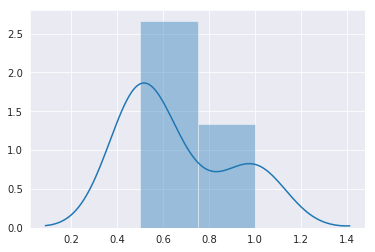

In [16]:
sb.distplot(sigmoid_cvl)

In [42]:
cross_vals = {}
for kernel in SVMs.keys():
     _tmp = cross_val_score(SVMs[kernel], X2, y, scoring='accuracy', cv = 15)
     cross_vals.update({kernel: _tmp})  

In [46]:
for val in cross_vals.keys():
    print(f'{val} kerlnel, mean accuracy: {round(cross_vals[val].mean(), 3)}')

linear kerlnel, mean accuracy: 0.606
rbf kerlnel, mean accuracy: 0.583
sigmoid kerlnel, mean accuracy: 0.661


## Grid Search for optimizing parameters

In [66]:
param_grid = {
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'C': [0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]
}


In [67]:
# Make grid search classifier
clf_grid = GridSearchCV(SVC(), param_grid, verbose=1)

In [68]:
clf_grid.fit(X_train, y_train)

/home/gml/anaconda3/envs/DiabManager/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:    0.5s finished
/home/gml/anaconda3/envs/DiabManager/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'rbf', 'sigmoid', 'poly'], 'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 1e-05, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [69]:
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Best Parameters:
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best Estimators:
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [70]:
optimum = cross_val_score(SVC(**clf_grid.best_params_) , X2, y, scoring='accuracy', cv = 15)

In [71]:
print(f'Cross validation scores: \nMin: {optimum.min()}, Mean: {round(optimum.mean(),3)}, Max: {optimum.max()}')

Cross validation scores: 
Min: 0.5, Mean: 0.861, Max: 1.0


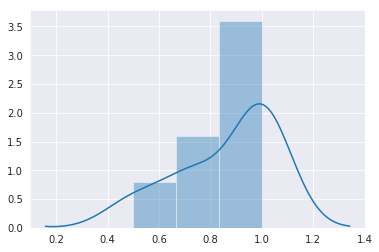

In [72]:
sb.distplot(sigmoid_cvl)

In [65]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs to provide a ``score`` function,
 |      or ``scoring`` must be passed.
 |  
 |  param_grid : dict or list of dictionaries
 |      Dictionary with parameters names (string) as ke